# Initialize the System

In [33]:
from datetime import datetime

import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns


In [34]:
num_train = 15000       # 60000 for full data set 
num_test  = 2500        # 10000 for full data set

txt_out_file_path = 'svm-parameter-tuning-log.txt'
def print_to_txt_file(*s):
    with open(txt_out_file_path, 'a') as f:
        for arg in s:
            print(arg, file=f)
            print(arg)

In [35]:
# Fetch Data automatically
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
# Display (Train) (Test) datasets
print("Data : Dataset Trainingset")
print(x_train.shape, x_test.shape)
print("Labels : Dataset Trainingset")
print(y_train.shape, y_test.shape)

Data : Dataset Trainingset
(60000, 28, 28) (10000, 28, 28)
Labels : Dataset Trainingset
(60000,) (10000,)


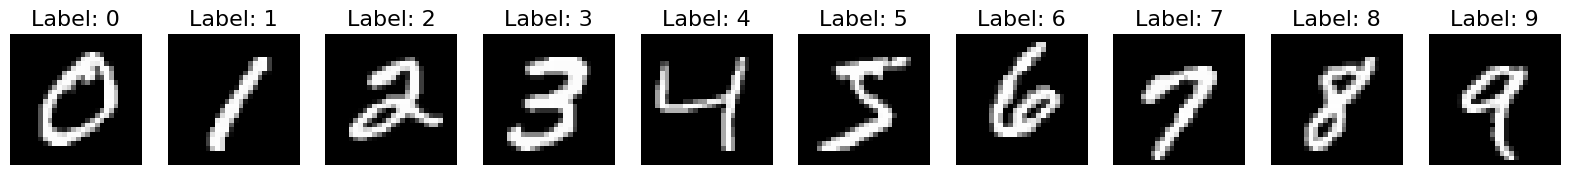

In [37]:
num_classes = 10 # 0 .. 9
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)
  ax[i].axis('off')

# Prepare loaded data

In [38]:
train_data = x_train.reshape(60000, 784).astype("float32") / 255
train_label = y_train.astype("float32")

test_data = x_test.reshape(10000, 784).astype("float32") / 255
test_label = y_test.astype("float32")

In [39]:
train_data = train_data[1:num_train,]
train_label = train_label[1:num_train]

test_data = test_data[1:num_test,]
test_label = test_label[1:num_test]

In [40]:
# Display (Train) (Test) datasets
print("Reshaped Data : Dataset Trainingset")
print(train_data.shape, test_data.shape)
print("Reshaped Labels : Dataset Trainingset")
print(train_label.shape, test_label.shape)

Reshaped Data : Dataset Trainingset
(14999, 784) (2499, 784)
Reshaped Labels : Dataset Trainingset
(14997,) (2497,)


# Run Support-Vector Machines

## Linear SVC

In [41]:
# Eval SVM on Training Data
svm = SVC(kernel='linear')
#svm.fit(train_data, train_label)
#pred_train = svm.predict(train_data)
#print("Accuracy: " + svm.score(train_data, train_label)) # Mean Accuracy on the given test data and labels

In [42]:
# Eval SVM on test data
svm = SVC(kernel='linear')
#svm.fit(test_data, test_label)
#pred_train = svm.predict(test_data)
#svm.score(test_data, test_label) # Mean Accuracy on the given test data and labels

## Poly SVC

In [43]:
# Eval SVM on Training Data
svm = SVC(kernel='poly')
#svm.fit(train_data, train_label)
#pred_train = svm.predict(train_data)
#svm.score(train_data, train_label) # Mean Accuracy on the given test data and labels

In [44]:
# Eval SVM on Training Data
svm = SVC(kernel='poly')
#svm.fit(train_data, train_label)
#pred_train = svm.predict(train_data)
#svm.score(train_data, train_label) # Mean Accuracy on the given test data and labels

## RBF SVC

In [45]:
# Eval SVM on Training Data
svm = SVC(kernel='rbf')
#svm.fit(train_data, train_label)
#pred_train = svm.predict(train_data)
#svm.score(train_data, train_label) # Mean Accuracy on the given test data and labels

In [46]:
# Eval SVM on Training Data
svm = SVC(kernel='rbf')
#svm.fit(train_data, train_label)
#pred_train = svm.predict(train_data)
#svm.score(train_data, train_label) # Mean Accuracy on the given test data and labels

# SVC Parameter Search

Note: Takes a very long time. To reach acceptable execution time, switch to RandomSearch instead of GridSearch or deactivate some factors, such as gamma.

In [47]:
### Takes a very long time (~~ 10m)
# Some may be commented/deactivated for acceptable execution time
svm = SVC()
parameters = {
        "kernel":("linear", "poly", "rbf"), 
        "C":[1,10],             # The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example.
        #"gamma":[1e-3, 1e-4],   # Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
}
scores = [
    #"accuracy",     # The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
    "precision",    # The precision is intuitively the ability of the classifier not to label as positive a sample that is negative
    "recall",       # The recall is intuitively the ability of the classifier to find all the positive samples.
    ]
for score in scores:
    print_to_txt_file("--- [%s] Running Parameter-Tests ---" % datetime.now())
    print_to_txt_file("Tuning parameters for criteria [%s]" % score)
    grid = GridSearchCV(estimator=svm, param_grid=parameters, scoring="%s_macro" % score, verbose=3)

    grid.fit(train_data, train_label)

    print_to_txt_file("Best parameters set found on following development set:")
    print_to_txt_file("\tSupport Vector: %s" % grid.best_estimator_)
    print_to_txt_file("\tSupport Vector Parametrization: %s" % grid.best_params_)
    print_to_txt_file("\tAsserted Score: %s" % grid.best_score_)
    print_to_txt_file("Total Score \t\t Configurations")

    means = grid.cv_results_["mean_test_score"]
    stds = grid.cv_results_["std_test_score"]
    params = grid.cv_results_["params"]
    for mean, std, params in zip(means, stds, params):
        print_to_txt_file("%0.3f (+/-%0.03f)\t%r" % (mean, std, params))
        print_to_txt_file("")
    print("Wrote classifier comparisons to file ", txt_out_file_path)

    print("Detailed classification report:")
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    
    y_true, y_pred = test_label, grid.predict(test_data)
    print(classification_report(y_true, y_pred))
    print()

--- [2022-09-06 14:21:27.980982] Running Parameter-Tests ---
Tuning parameters for criteria [precision]


ValueError: Found input variables with inconsistent numbers of samples: [14999, 14997]